# Overview

The dataset comes from Kaggle competition First GOP Debate Twitter Sentiment database.

(https://www.kaggle.com/crowdflower/first-gop-debate-twitter-sentiment/data) 

There are 3 differet sentiments in the dataset including Negative, Neutral, Positive. The goal is to differentiate Negative and Positive tweets. Therefore only Negative and Positive tweets are reserved.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
import pandas as pd
dat=pd.read_csv('C:\\Users\\pengq\\GOP twitter\\GOP sentiment.csv')
data=dat[dat.sentiment!='Neutral']

In [3]:
df=pd.DataFrame({'text':data.text, 'sentiment':data.sentiment})

# Clean text data

In [4]:
stopwords_set=set(stopwords.words('english'))
for index, row in df.iterrows():
    words_filtered=[e.lower() for e in row.text.split()\
                   if len(e)>=3]
    words_cleaned=[word for word in words_filtered
                  if 'http' not in word
                  and not word.startswith('@')
                  and not word.startswith('#')
                  and word!= 'RT']
    words_without_stopwords=[word for word in words_cleaned
                             if not word in stopwords_set]
    tt=" ".join(words_without_stopwords)
    df.set_value(index, 'tt', tt)

C:\Users\pengq\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [5]:
dtf=pd.DataFrame({'text':df.tt, 'sentiment':df.sentiment})

In [6]:
dtf.head()

,sentiment,text
1,Positive,catch full last night. scott's best lines seco...
3,Positive,carly fiorina trending hours debate men just-c...
4,Positive,delivered highest ratings history presidential...
5,Positive,"""on first day rescind every illegal executive ..."
6,Negative,liked happy heard going moderator. anymore.


# Descriptive Statistical Summary of the training set

In [7]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [8]:
#z={'0':'Negative', '1':'Neutral', '2':'Positive'}
data=[go.Bar(x=dtf.sentiment.unique(),
      y=dtf.sentiment.value_counts().values,
      marker=dict(colorscale='Jet',
                 color=dtf.sentiment.value_counts().values),
            text='Sentiments attributed to Author')]
layout = go.Layout(title='Twitter Text Variable Distribution')
fig=go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

In [9]:
from collections import Counter
all_words="".join(dtf.text)
a=all_words.split()
b=Counter(a).most_common(50)
key=[]
value=[]
for i in range(0, 50):
    key.append(b[i][0])
    value.append(b[i][1])

In [12]:
data = [go.Bar(
            x = key,
            y = value,
            marker= dict(colorscale='Jet',
                         color = value
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Cleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Encode categorical variable Sentiment

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dtf.iloc[:,0]=le.fit_transform(dtf.iloc[:,0])

In [14]:
dtf.head(7)

,sentiment,text
1,1,catch full last night. scott's best lines seco...
3,1,carly fiorina trending hours debate men just-c...
4,1,delivered highest ratings history presidential...
5,1,"""on first day rescind every illegal executive ..."
6,0,liked happy heard going moderator. anymore.
8,0,"deer headlights ben carson, may brain surgeon ..."
9,0,last night's debate proved it!


negative = 0
positive = 1

# Split data into training and test sets

In [15]:
from sklearn.cross_validation import train_test_split
X_train, x_test, y_train, y_test = train_test_split(dtf.text, dtf.sentiment, test_size=0.33, random_state=53)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



# Build up word vectors using both CountVectorizer and TfidfVectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [17]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(x_test)

In [18]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [19]:
count_df=pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df=pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [20]:
count_df.head()

,00,000,07,10,100,1000s,100k,10k,10x,11,...,zetas,zinger,zingers,zinggg,zombie,zombies,zone,zones,zuckerberg,zygote
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
tfidf_df.head()

,00,000,07,10,100,1000s,100k,10k,10x,11,...,zetas,zinger,zingers,zinggg,zombie,zombies,zone,zones,zuckerberg,zygote
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Confusion Matrix Helper function

In [22]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, 
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print ('Normalized confusion matrix')
    else:
        print ('Confusino matrix, without normalization')
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial Naive Bayes

accuracy: 0.831
Confusino matrix, without normalization


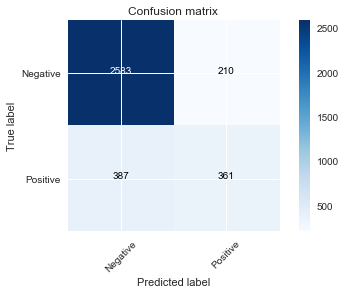

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb=MultinomialNB()
mnb.fit(count_train, y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test, pred)
print ('accuracy: %0.3f'% score)
cm=metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['Negative','Positive'])

accuracy: 0.826
Confusino matrix, without normalization


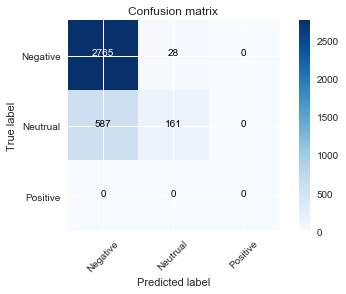

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb=MultinomialNB()
mnb.fit(tfidf_train, y_train)
pred=mnb.predict(tfidf_test)
score=metrics.accuracy_score(y_test, pred)
print ('accuracy: %0.3f'% score)
cm=metrics.confusion_matrix(y_test, pred, labels=[0,1,2])
plot_confusion_matrix(cm, classes=['Negative','Neutrual','Positive'])

# PassiveAggressiveClassifier

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning:

n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.



accuracy: 0.796
Confusino matrix, without normalization


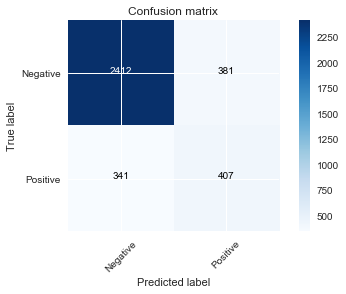

In [25]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
pac=PassiveAggressiveClassifier(n_iter=50)
pac.fit(count_train, y_train)
pred=pac.predict(count_test)
score=metrics.accuracy_score(y_test, pred)
print ('accuracy: %0.3f'% score)
cm=metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['Negative','Positive'])

accuracy: 0.803
Confusino matrix, without normalization


C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning:

n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.



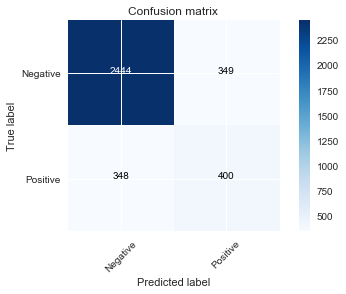

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
pac=PassiveAggressiveClassifier(n_iter=50)
pac.fit(tfidf_train, y_train)
pred=pac.predict(tfidf_test)
score=metrics.accuracy_score(y_test, pred)
print ('accuracy: %0.3f'% score)
cm=metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['Negative','Positive'])

# Support Vector Machine

accuracy: 0.789
Confusino matrix, without normalization


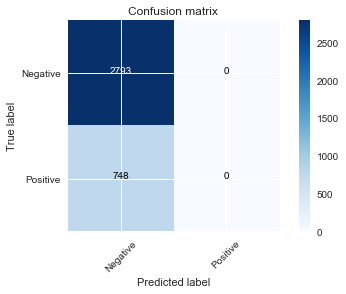

In [27]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(C=1, probability=True)
svc.fit(count_train, y_train)
pred=svc.predict(count_test)
score=metrics.accuracy_score(y_test, pred)
print ('accuracy: %0.3f'% score)
cm=metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['Negative','Positive'])

accuracy: 0.789
Confusino matrix, without normalization


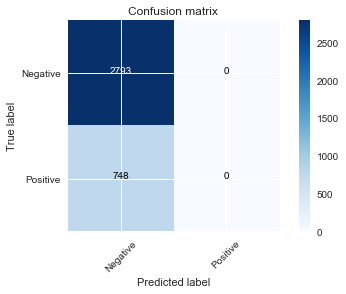

In [28]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(C=1, probability=True)
svc.fit(tfidf_train, y_train)
pred=svc.predict(tfidf_test)
score=metrics.accuracy_score(y_test, pred)
print ('accuracy: %0.3f'% score)
cm=metrics.confusion_matrix(y_test, pred, labels=[0,1])
plot_confusion_matrix(cm, classes=['Negative','Positive'])

# Parameter Tuning 

According to the results above, NaiveBayes Model performs best of all the models. So I'll try to tune it's parameter. However, here there's not much difference in the result by tuning the parameters. But the best range of alpha lies between 0.1 and 0.2 where the score is the highest.

In [29]:
clf=MultinomialNB(alpha=0.1)
last_score=0
for alpha in np.arange(0, 1, .1):
    nb_classifier=MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred=nb_classifier.predict(tfidf_test)
    score=metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf=nb_classifier
    print ("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))
    

Alpha: 0.00 Score: 0.83366
Alpha: 0.10 Score: 0.84101
Alpha: 0.20 Score: 0.84129
Alpha: 0.30 Score: 0.83451
Alpha: 0.40 Score: 0.83282
Alpha: 0.50 Score: 0.83169
Alpha: 0.60 Score: 0.82971
Alpha: 0.70 Score: 0.82971
Alpha: 0.80 Score: 0.82632
Alpha: 0.90 Score: 0.82632


C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



# Inspecting the top30 vectors for Negative and Positive tweets

In [30]:
def most_informative_feautre_for_binary_classification(vectorizer, classifier, n=100):
    class_labels=classifier.classes_
   # if classifier.classes_== 0:
   #     class_labels='Negative'
   # elif classifier.classes == 1:
   #     class_labels='Neutral'
   # 
   # else:
   #     class_labels='Positive'
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    
    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)
    print ()
    
    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


In [31]:
most_informative_feautre_for_binary_classification(tfidf_vectorizer, pac, n=30)

0 -7.125536731325057 ron
0 -6.379352829481581 overall
0 -6.12361149828683 lied
0 -5.757826708490641 pig
0 -5.544873752080994 does
0 -5.052959325733451 chrischristie
0 -5.027474245066974 disappointed
0 -5.018633946489753 bodies
0 -5.00200009885629 ht
0 -4.991656802361543 knock
0 -4.930564806716194 fuck
0 -4.929734503262369 slogan
0 -4.924248804145062 business
0 -4.912929736708737 stop
0 -4.847361943474756 impression
0 -4.826088221019194 money
0 -4.813020561707815 cycle
0 -4.809243946816055 shit
0 -4.7908001100856294 wrong
0 -4.716407261728212 lying
0 -4.704794473445422 maybe
0 -4.694027169483915 significantly
0 -4.611153382650167 rick
0 -4.599866354345131 police
0 -4.571166237025143 loser
0 -4.544384524460349 problem
0 -4.538384637736271 liberals
0 -4.53322201215865 paymasters
0 -4.454471819924452 labotomy
0 -4.450592513298846 ask

1 8.785096513489123 contenders
1 7.097888481313319 strong
1 6.932988377416094 enjoyed
1 6.817745373086423 ultimately
1 6.7785471620432105 substance
1 6.67132